In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Load the dataset
emd_genres = pd.read_csv("/home/jellek23/MAMxAI/data/datasets/EMD (Dutch Top 40)/genre_extraction_and_labelling/EMD_spotify_genres_complete_GRA_without_Spotify.csv")
emd_genres

,Artist + song,Track ID,reducedGenre
0,Gabry Ponte x Lum!x feat. Daddy DJ - We Could ...,3ElGRG3DqSzzkh1b2wnbzf,Pop
1,Maan & D J V T - Naar De Maan,7aDHKwBUUx7dmuuyCQygD4,Pop
2,FMG - Boot,5DhLsu431rudt8PENvUDao,Hip Hop
3,"Black Eyed Peas, Shakira + David Guetta - Don'...",0gYXw7aPoybWFfB7btQ0eM,Pop
4,Tiësto & Charli XCX - Hot In It,5pNFibJLq7dvoDVIIcQBkn,Electronic
...,...,...,...
8965,Steve Winwood - While You See A Chance,4JAFyW6oZV6DIADeV619QG,Rock
8966,Corrie Van Gorp - Ik Ben Tamboer,7cTRkrytpLxHIA4zR3RqTK,Pop
8967,Maria Verano - Get Up,6oYRQXSdHIdDP3kCkrMKM4,Electronic
8968,Climax Blues Band - Gotta Have More Love,6V6yjO9XpmrM4yaQJu5sON,Rock


In [5]:
# Total number of tracks in the dataset
total_tracks = emd_genres.shape[0]
print(f"Total number of tracks in EMD: {total_tracks}")

# Genre composition and diversity score using entropy
def calculate_entropy(df):
    genre_counts = df['reducedGenre'].dropna().str.split(', ').explode().value_counts()
    proportions = genre_counts / genre_counts.sum()
    proportions = proportions[proportions > 0]  # Filter out zero proportions
    return -np.sum(proportions * np.log2(proportions))

entropy_score = calculate_entropy(emd_genres)
print(f"Genre diversity score (entropy): {entropy_score:.4f}")

Total number of tracks in EMD: 8970
Genre diversity score (entropy): 2.3753


In [6]:
# Function to calculate genre proportions
def calculate_genre_proportions(df):
    genre_counts = df['reducedGenre'].value_counts()
    total_tracks = len(df)
    genre_proportions = (genre_counts / total_tracks) * 100  # Convert to percentage
    # Create a DataFrame with results
    genre_proportion_df = pd.DataFrame({
        'Genre': genre_proportions.index,
        'Proportion (%)': genre_proportions.values,
        'Track count': genre_counts.values
    }).sort_values(by='Proportion (%)', ascending=False)

    return genre_proportion_df

# Calculate overall genre proportions
overall_genre_proportions = calculate_genre_proportions(emd_genres)
overall_genre_proportions

,Genre,Proportion (%),Track count
0,Pop,46.432553,4165
1,Rock,20.066890,1800
2,Electronic,11.204013,1005
3,R&B,9.074693,814
4,Hip Hop,5.953177,534
5,Folk/Acoustic,2.084727,187
6,Metal,1.348941,121
7,Easy listening,0.880713,79
8,Jazz,0.780379,70
9,Latin,0.713489,64


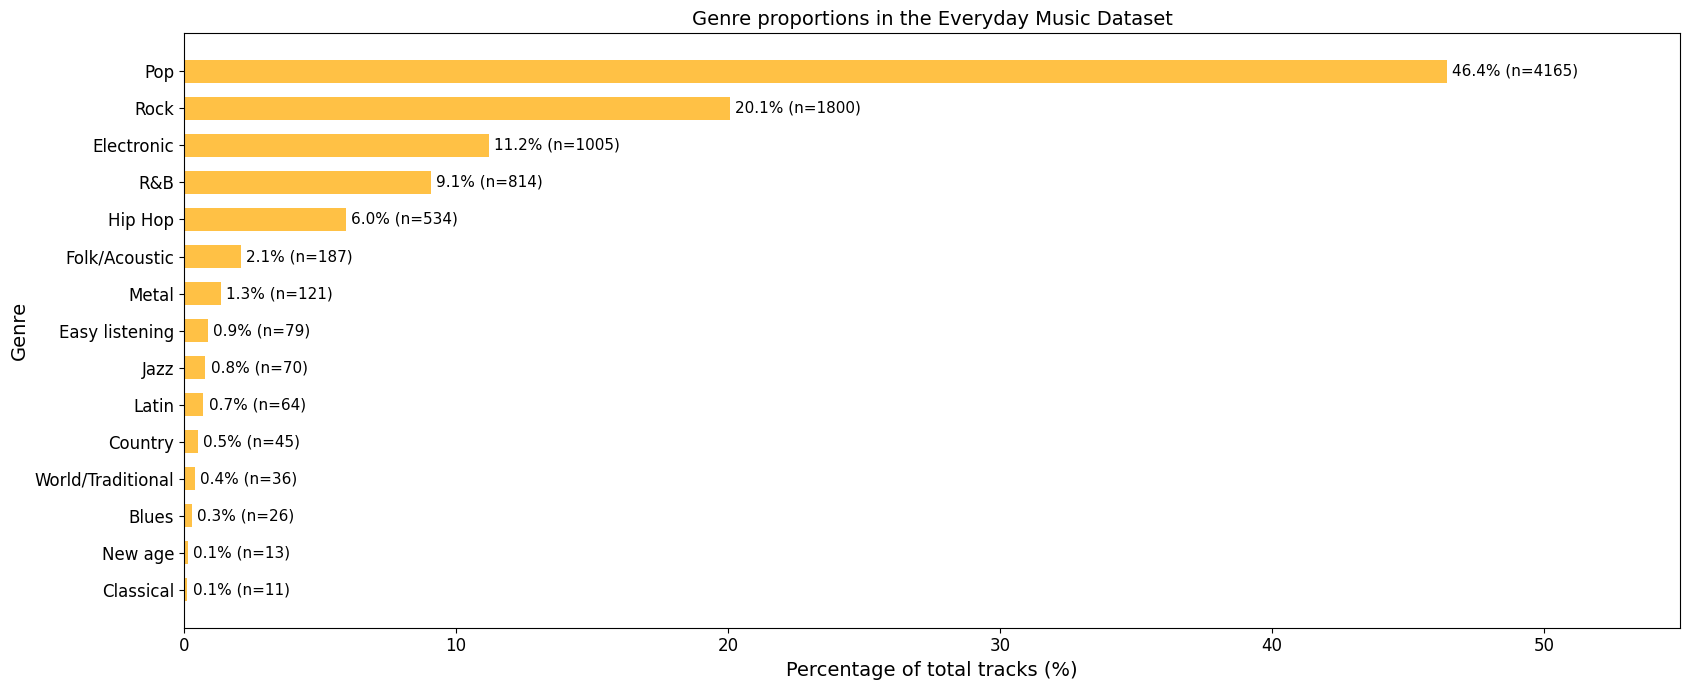

In [7]:
# Sort genres by proportion in descending order (highest to lowest)
overall_genre_proportions = overall_genre_proportions.sort_values(by='Proportion (%)', ascending=True)

# Plot overall genre proportions with horizontal bars
plt.figure(figsize=(17, 7))
bar_width = 0.6  # Adjusted for a clean academic look

# Plot horizontal bar chart
plt.barh(
    overall_genre_proportions['Genre'],
    overall_genre_proportions['Proportion (%)'],
    color="#FFC145",
    height=bar_width,
)

# Add labels with percentage and track count (n=)
for index, (percentage, track_count) in enumerate(zip(overall_genre_proportions['Proportion (%)'], overall_genre_proportions['Track count'])):
    plt.text(percentage + 0.2, index, f"{percentage:.1f}% (n={track_count})", va="center", fontsize=11)

# Add axis labels and title
plt.xlabel("Percentage of total tracks (%)", fontsize=14)
plt.ylabel("Genre", fontsize=14)
plt.title("Genre proportions in the Everyday Music Dataset", fontsize=14)
plt.xticks(fontsize=12)
plt.xlim(0, 55)
plt.yticks(fontsize=12)

# Improve layout and save figure
plt.tight_layout()
plt.show()